In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
january = pd.read_csv("January.csv")
february = pd.read_csv("February.csv")
march = pd.read_csv("March.csv")
april = pd.read_csv("April.csv")
may = pd.read_csv("May.csv")
june = pd.read_csv("June.csv")
july = pd.read_csv("July.csv")
august = pd.read_csv("August.csv")
september = pd.read_csv("September.csv")
october = pd.read_csv("October.csv")
november = pd.read_csv("November.csv")
december = pd.read_csv("December.csv")

In [ ]:
# Create a list of DataFrames
dataframes = [
    january,
    february,
    march,
    april,
    may,
    june,
    july,
    august,
    september,
    october,
    november,
    december
]

# Concatenate the DataFrames
data = pd.concat(dataframes)


In [ ]:
hours = data[['started_at', 'ended_at']]

In [ ]:
# Extract hours from started_at and ended_at
hours['started_at'] = hours['started_at'].str.split().str[1].str[:2].astype(int)
hours['ended_at'] = hours['ended_at'].str.split().str[1].str[:2].astype(int)

# Calculate duration (assuming ended_at is always later than started_at)
hours['duration_in_hours'] = hours['ended_at'] - hours['started_at']

<ipython-input-6-2e236a2b24f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours['started_at'] = hours['started_at'].str.split().str[1].str[:2].astype(int)
<ipython-input-6-2e236a2b24f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours['ended_at'] = hours['ended_at'].str.split().str[1].str[:2].astype(int)
<ipython-input-6-2e236a2b24f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
data.dropna(inplace = True)



In [ ]:
# prompt: I want to get the peak hour by using hours['started_at'], and how many time it occurs

peak_hour = hours['started_at'].idxmax()
peak_hour_count = hours['started_at'].max()

print(f"The peak hour is {peak_hour} and it occurs {peak_hour_count} times.")


The peak hour is 192 and it occurs 23 times.


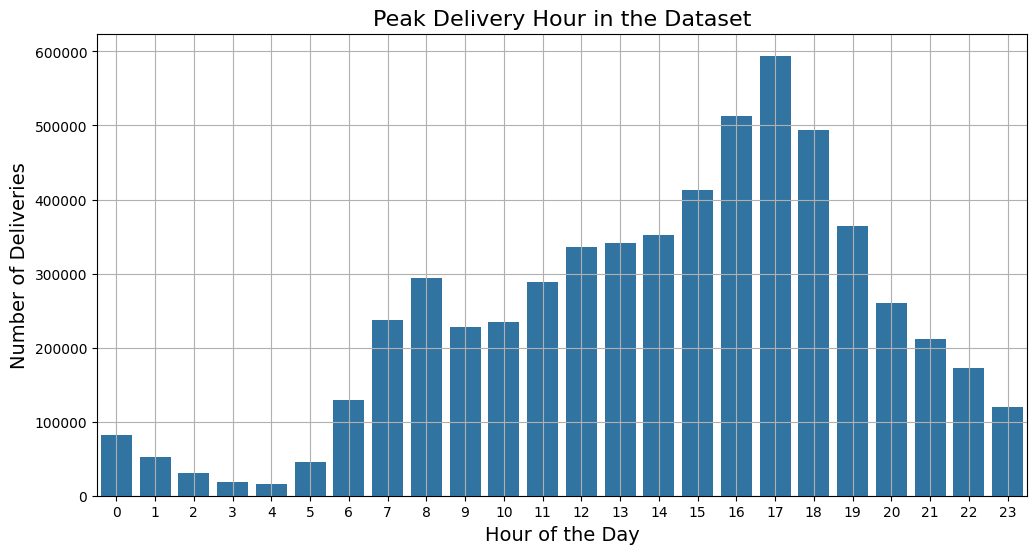

<Figure size 640x480 with 0 Axes>

In [ ]:
# prompt: add details to the graph and make it more presentable

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hours['started_at'].value_counts().index, y=hours['started_at'].value_counts().values)

# Add details to the graph
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Deliveries", fontsize=14)
plt.title("Peak Delivery Hour in the Dataset", fontsize=16)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()
plt.savefig('plot.png')


In [ ]:
from datetime import datetime


In [ ]:
# prompt: hours['started_at'].value_counts() I want to know what is the most frequent value in it, and how many of them there are

most_frequent_hour = hours['started_at'].value_counts().idxmax()
most_frequent_count = hours['started_at'].value_counts().max()

if most_frequent_hour > 12:
  most_frequent_hour_12 = most_frequent_hour - 12
  time_of_day = " PM"
else:
  most_frequent_hour_12 = most_frequent_hour
  time_of_day = " AM"

most_frequent_hour_12 = f"{most_frequent_hour_12}{time_of_day}"

print(f"The most frequent hour is {most_frequent_hour_12} and it occurs {most_frequent_count} times.")


The most frequent hour is 5 PM and it occurs 594163 times.


In [ ]:
# prompt: I have data frame named ("data") that has the columns ["start_station_name",  "start_station_id", "end_station_name", "end_station_id"] how can I get the most frequent station?

most_frequent_station = data['start_station_name'].value_counts().idxmax()
most_frequent_station_count = data['start_station_name'].value_counts().max()

print(f"The most frequent station is {most_frequent_station} and it occurs {most_frequent_station_count} times.")


The most frequent station is Streeter Dr & Grand Ave and it occurs 69097 times.


In [ ]:
# prompt: I have this (plt) plot graph could you put it instead of the plot that you has and put all the details and outputs in a nice html page with all of the values


# Create the HTML page
html_string = """
<!DOCTYPE html>
<html>
<head>
  <title>Peak Delivery Hour Analysis</title>
</head>
<body>
  <h1>Peak Delivery Hour Analysis</h1>

  <p><b>Most Frequent Hour:</b> {}</p>
  <p><b>Most Frequent Hour Count:</b> {}</p>

  <p><b>Most Frequent Station:</b> {}</p>
  <p><b>Most Frequent Station Count:</b> {}</p>

  <img src="plot.png" alt="Peak Hour Bar Chart">

</body>
</html>
""".format( most_frequent_hour_12, most_frequent_count, most_frequent_station, most_frequent_station_count)

# Save the HTML page to a file
with open("peak_hour_analysis.html", "w") as f:
  f.write(html_string)

# Display the HTML page
from IPython.display import HTML
HTML("peak_hour_analysis.html")

